In [1]:
## Initialization and imports
import pandas as pd 
import numpy as np 

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import dendrogram, linkage

from matplotlib import pyplot as plt
%matplotlib inline  
%config InlineBackend.figure_format='retina'

## Set random seed
np.random.seed(seed=14)

In [2]:
## Read in pickle data
ing_freq = pd.read_pickle("../model/user_f_df.p")
ing_freq.sample(3)

,rocket salad,falafel,cognac,thai chili,herbs,tropical salsa (maracuja juice - mango - habanero),tahini sauce,almond milk,lebanese spices,mushrooms,...,"lollo bionda, lollo rosso, corn, tomato, cucumber, black beans, carrot",xanthan,fried onion,ox cheek,rice vinegar,caraway,red curry paste,truffle oil,white cabbage,cust_id
307,0.0,0.0,0.0,0.0,0.076,0.0,0.038,0.0,0.0,0.228,...,0.0,0.038,0.038,0.0,0.0,0.0,0.0,0.0,0.038,0030N00002QQPTNQA5
130,0.0,0.0,0.0,0.0,0.284,0.0,0.000,0.0,0.0,0.071,...,0.0,0.000,0.071,0.0,0.0,0.0,0.0,0.0,0.071,0030N00002WyAiuQAF
270,0.0,0.0,0.0,0.0,0.200,0.0,0.000,0.0,0.0,0.000,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0030N00002QPkiPQAT


In [3]:
ing_freq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382 entries, 0 to 381
Columns: 914 entries, rocket salad to cust_id
dtypes: float64(913), object(1)
memory usage: 2.7+ MB


In [4]:
## Need to scale the features for clustering (distance metric)
def scale_df(df):
    for col in df.columns:
        if col != 'cust_id':
            df[col] = (df[col] - df[col].mean())/df[col].std()
    return df
        
ing_freq = scale_df(ing_freq)

In [5]:
## Exploring which ingredients are the most and least used
cols = ing_freq.columns
ing_means = ing_freq[cols].var()  ## The variance in frequency would indicate strong preferences on ingredient
top_ings = ing_means.sort_values().index.values[:]  ## Choosing the x ingredients with the most variance

top_ing_f = ing_freq[top_ings]
top_ing_f.head(4)

,lemon zest,salmon ceviche,"vinaigrette (olive oil, red vinegar)",salsa verde,chayote,noodles,truffles,fruit cocktail,indian cream cheese,chickpea salad,...,orange,mango lassi (mango/milk/yoghurt),aberdeen angus beef,cabbage turnip,banana leaf (inedible),marinated zucchini,coconut chips,caesar-dressing,salanova oak salad,sugar pod
0,-0.068784,-0.098274,-0.060003,-0.163324,-0.076386,-0.110198,-0.225438,-0.05919,-0.05919,-0.05919,...,-0.115365,-0.14304,-0.107446,-0.063793,-0.086779,-0.129762,-0.093644,-0.093644,-0.131181,-0.077658
1,-0.068784,-0.098274,-0.060003,-0.163324,-0.076386,-0.110198,-0.225438,-0.05919,-0.05919,-0.05919,...,-0.115365,-0.14304,-0.107446,-0.063793,-0.086779,-0.129762,-0.093644,-0.093644,-0.131181,-0.077658
2,-0.068784,-0.098274,-0.060003,-0.163324,-0.076386,-0.110198,0.520167,-0.05919,-0.05919,-0.05919,...,-0.115365,-0.14304,-0.107446,-0.063793,-0.086779,-0.129762,-0.093644,-0.093644,-0.131181,-0.077658
3,-0.068784,-0.098274,-0.060003,-0.163324,-0.076386,10.916523,-0.225438,-0.05919,-0.05919,-0.05919,...,-0.115365,-0.14304,-0.107446,-0.063793,-0.086779,-0.129762,7.429828,7.429828,-0.131181,-0.077658


#### Kmeans clustering

In [13]:
## Assinging the features to X
X = top_ing_f.values

## Kmeans object with cluster rows are clusters and cols are feature coords
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

In [11]:
## Print the top words from each topic
def print_top_ingredients(centroid_data, vocab, n_top_words):
    
    ## Getting sorted indexs of feature importance
    sortedX = np.argsort(centroid_data, axis = 1)
    
    ## Printing top words in each 'topic'
    for i, row in enumerate(sortedX[:, -1:-n_top_words-1:-1]):
        print("Topic", i,':', ', '.join([vocab[i] for i in row]))

In [12]:
print_top_ingredients(kmeans.cluster_centers_, top_ings, 7)

Topic 0 : scallion, asia-sauerkraut, salmon ceviche, soy milk, canola oil, pulled chicken, chayote
Topic 1 : garlic, cauliflower, cumin, sprouts, corn flour, bulgur, pine nuts
Topic 2 : wholegrain couscous, capsicum, sweet thai basil, zatar, flatbread (extra), orchid (inedible), yellow curry paste
Topic 3 : béchamel sauce, lenses, whole wheat flour, coriander seeds, leek onions, backed banana, potato chickpeas dumplings
Topic 4 : pumpkin seed oil, mayonnaise (extra), ketchup (extra), barbeque sauce, burger bun, tortilla wrap (wheat), white turnip


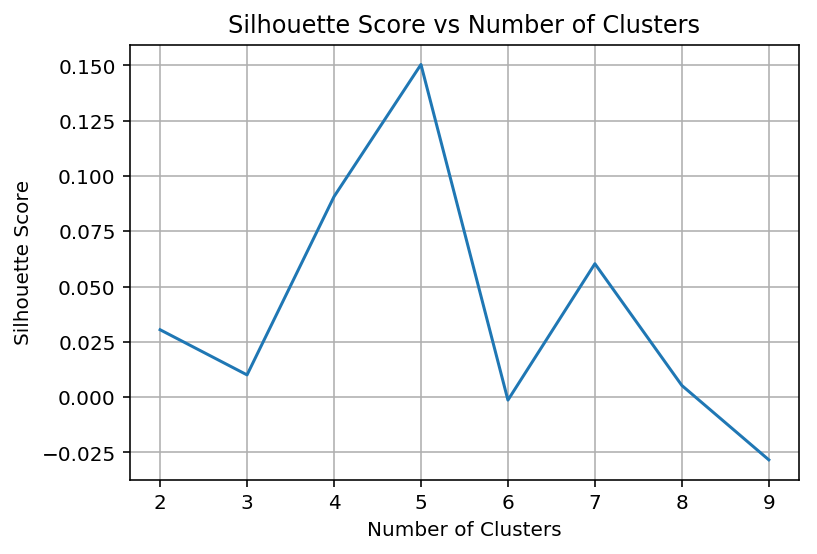

In [9]:
## Scoring Kmeans

## Running kmeans
def run_kmeans(data, n):
    kmeans = KMeans(n_clusters=n, random_state=0).fit(data)
    
    return silhouette_score(data, kmeans.labels_)


## Finds the opitmal k value
def find_k(data, k):
    sil_scores = []
    for i in range(2, k):
        scores = (run_kmeans(data, i))
        sil_scores.append(scores)
        
    return sil_scores 

sils = find_k(X, 10)

plt.title("Silhouette Score vs Number of Clusters")
plt.ylabel("Silhouette Score")
plt.xlabel("Number of Clusters")
plt.grid()
plt.plot(range(2, len(sils)+2), sils)

#### Hierarchical Clustering

In [14]:
def high_clustering(data, sample_size, dist_measure='cosine', plot='yes'):

    ## Selecting n random customers to look at
    trimmed_data = np.random.choice(range(data.shape[0]), sample_size)
    X = data.iloc[trimmed_data]

    ## Get vector distances (can be different measures) and squaring array
    Y = pdist(X, 'cosine')
    squareY = squareform(Y)

    ## Creates the linkage matrix with 
    return linkage(squareY, 'average')

## Plot the dendrogram
def plot_dendro(Z, orient='top', thresh=None, font_s=20):
    fig = plt.figure(figsize=(25, 10))
    dn = dendrogram(Z)

    section = np.array(dn["ivl"]).astype(int)

    dn = dendrogram(Z, 
                    orientation=orient,
                    color_threshold=thresh,
                    leaf_font_size=font_s)
    plt.ylabel('Threshold')
    plt.xlabel('User')
    plt.title('User Ingredient Frequency Dendrogram')
    plt.show()

/Users/nschumacher/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  if sys.path[0] == '':


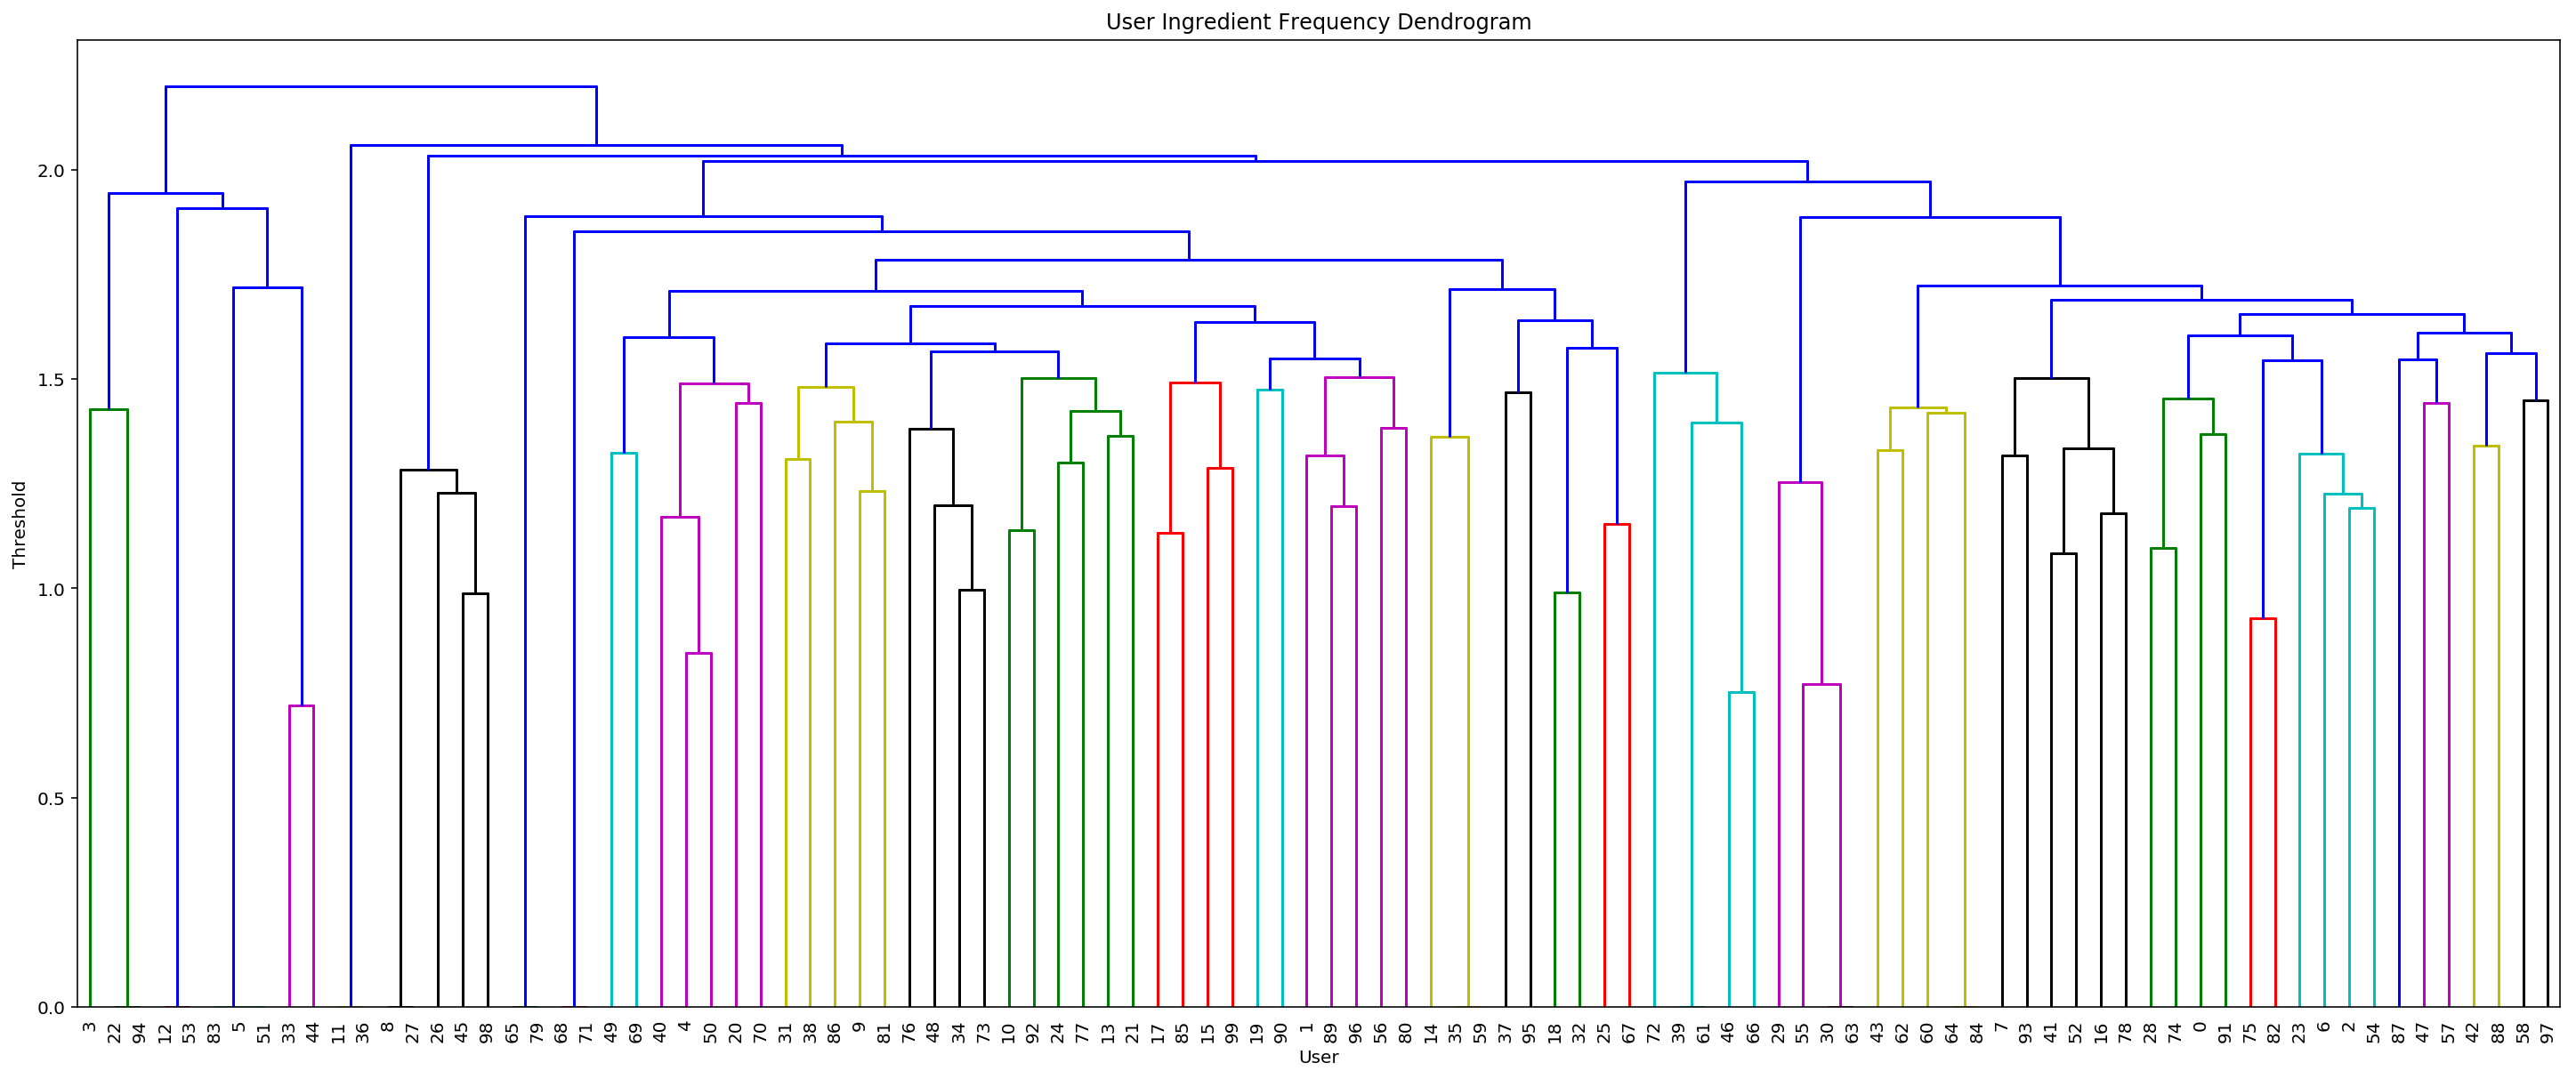

In [16]:
linkage1 = high_clustering(top_ing_f, 100)
plot_dendro(linkage1, orient='top', font_s=10)